#데이터분석프로그래밍 6주차 실습

## 실습 시작 전 유의사항

※ 상단 메뉴에서 '**파일 - 드라이브에 사본 저장**' 진행 후 시작하세요.\
※ 프로젝트 제목 뒤에 본인의 이름과 학번을 작성하세요. `ex) DataAnalysisProgramming_#01_202312345_정재호.ipynb`

## 실습 개요
- 여러 개의 그래프 시각화
- 누락 데이터 처리
- 범주형 데이터 처리



---



## 여러 개의 그래프 시각화
저번 실습에 이어 한 화면에 여러 개의 그래프를 그리는 방법을 실습해봅시다.

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive') # 구글 드라이브 연동
base_dir = '/content/drive/MyDrive/'
file_path = base_dir + "경기도인구데이터.csv"

df = pd.read_csv(file_path, encoding='CP949')
df = df.set_index('구분')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


먼저 하나의 화면에 여러 개의 그래프를 그리는 방법입니다.

하나의 axe 객체에 여러 개의 plot를 그리면 아래와 같은 결과가 나옵니다.

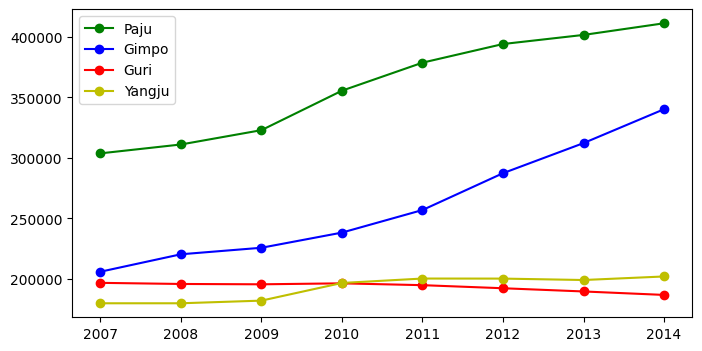

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df.loc['파주시',:], 'go-', label='Paju')
ax.plot(df.loc['김포시',:], 'bo-',label='Gimpo')
ax.plot(df.loc['구리시',:], 'ro-',label='Guri')
ax.plot(df.loc['양주시',:], 'yo-',label='Yangju')
ax.legend()

plt.show()

다음으로는 여러 개의 화면을 만들어 각 화면에 그래프를 그리는 방법입니다.

**`add_subplot`** 함수의 매개변수를 통해 figure를 여러 개의 화면으로 분할 할 수 있습니다.\
매개변수는 각각 **행 수, 열 수, 순번**을 의미합니다.

이렇게 생성된 각각의 axe 객체에 따로 그래프를 그릴 수 있습니다.

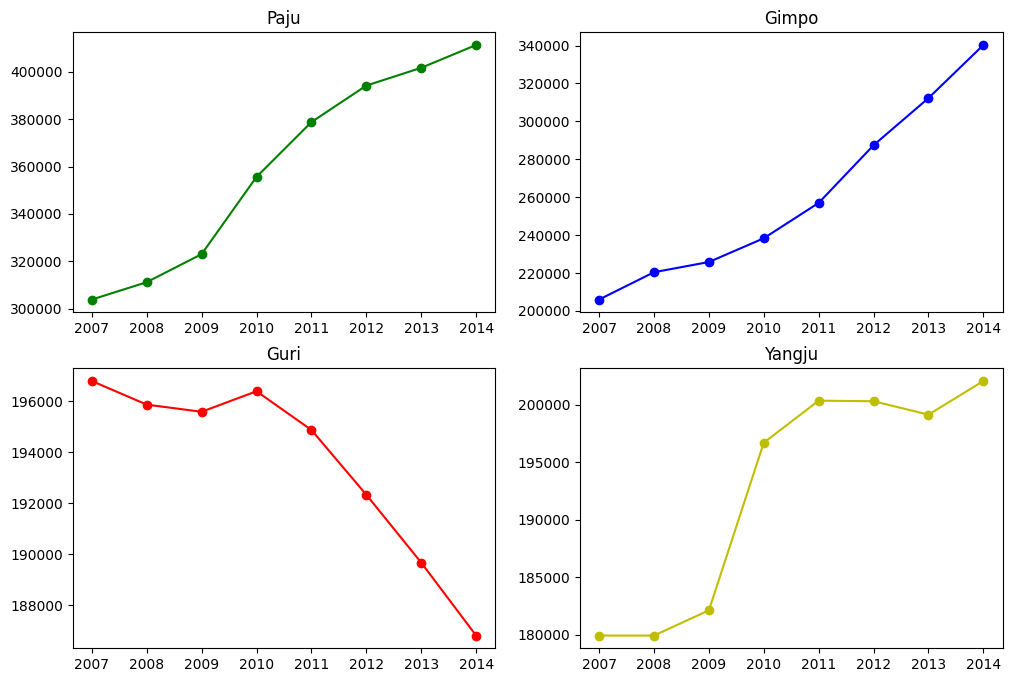

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(df.loc['파주시'], 'go-')
ax1.set_title("Paju")

ax2.plot(df.loc['김포시'], 'bo-')
ax2.set_title("Gimpo")

ax3.plot(df.loc['구리시'], 'ro-')
ax3.set_title("Guri")

ax4.plot(df.loc['양주시'], 'yo-')
ax4.set_title("Yangju")

plt.show()



---



seaborn에서 제공하는 planets 데이터셋을 바탕으로 실습을 진행해볼 것입니다.

아래 코드와 같이 **`load_dataset`** 함수를 통해 seaborn에서 제공하는 여러 데이터셋을 불러올 수 있습니다.

https://github.com/mwaskom/seaborn-data \
해당 링크에서 불러올 수 있는 데이터셋들을 확인할 수 있습니다.

In [ ]:
# 데이터셋 준비
import pandas as pd
import seaborn as sns
df = sns.load_dataset('planets')

df.head(5)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## 누락 데이터 처리
데이터셋은 여러 이유로 종종 누락된 데이터가 존재할 수 있습니다.

이를 가만히 두면 분석을 방해하거나 데이터의 품질을 저하하는 등의 문제를 일으킵니다.

이번 실습에서는 누락 데이터를 처리하는 대표적인 두 가지 방법을 소개하겠습니다.

### 1. 누락 데이터가 포함된 행 제거하기
DataFrame의 isnull 함수와 sum 함수를 사용하여 누락된 데이터의 수를 확인하고,\
누락 데이터가 **가장 많은 column**에 대하여 **`dropna`** 함수를 통해 데이터가 누락된 행들을 제거 해보세요.

In [ ]:
# Step 1. isnull 함수와 sum 함수를 통해 누락 데이터 확인
print("열별 누락된 데이터 개수")
print("=======================")
print(df.isnull().sum())
print("=======================")

# Step 2. dropna 함수를 통해 특정 열에 대해서만 누락 데이터 제거
# (전체 열 중 null이 가장 많은 열에 대해서만 제거하시오)
dropped_df = df.dropna(subset=['mass'], axis=0)

print(dropped_df)
# 출력의 마지막이 [513 rows x 6 columns] 가 나와야 정답입니다.

열별 누락된 데이터 개수
method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64
              method  number  orbital_period    mass  distance  year
0    Radial Velocity       1         269.300   7.100     77.40  2006
1    Radial Velocity       1         874.774   2.210     56.95  2008
2    Radial Velocity       1         763.000   2.600     19.84  2011
3    Radial Velocity       1         326.030  19.400    110.62  2007
4    Radial Velocity       1         516.220  10.500    119.47  2009
..               ...     ...             ...     ...       ...   ...
784  Radial Velocity       3         580.000   0.947    135.00  2012
913  Radial Velocity       1         677.800  19.800       NaN  2007
914  Radial Velocity       1           6.958   0.340       NaN  2014
915  Radial Velocity       1           5.118   0.400       NaN  2014
916  Radial Velocity       1         121.710   1.540       NaN  2014

[513 rows x 

이런 방법 외에도 DataFrame의 **`info`** 함수를 통해, 각 열에 Non-Null 데이터가 몇 개인지 알 수 있습니다.

이를 바탕으로 현재 **distance** 열에도 아직 Null 데이터가 존재함을 알 수 있습니다.

In [ ]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 916
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          513 non-null    object 
 1   number          513 non-null    int64  
 2   orbital_period  513 non-null    float64
 3   mass            513 non-null    float64
 4   distance        498 non-null    float64
 5   year            513 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 28.1+ KB


### 2. 누락 데이터를 대체 값으로 채우기
이번에는 distance 열의 NaN 데이터를 **평균값으로 대체**해볼 것입니다.

먼저, distance 열의 평균값을 계산하고, **`fillna`** 함수를 통해 NaN 데이터들을 평균값으로 대체해 보세요.

`(filled_df를 바탕으로 진행하세요)`

In [ ]:
filled_df = dropped_df.copy()

# Step 1. 통계함수를 통해 distance 열의 평균값 계산
mean_distance = filled_df['distance'].mean()

# Step 2. fillna 함수를 통해 distance 열의 NaN 데이터들을 평균값으로 대체
filled_df['distance'] = filled_df['distance'].fillna(mean_distance)
# filled_df['distance'].fillna(mean_distance, inplace=True)

filled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 916
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          513 non-null    object 
 1   number          513 non-null    int64  
 2   orbital_period  513 non-null    float64
 3   mass            513 non-null    float64
 4   distance        513 non-null    float64
 5   year            513 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 28.1+ KB


## 범주형 데이터 처리
연속적인 실수 데이터가 아닌 경우 컴퓨터가 인식할 수 없기 때문에 이를 변환하는 과정이 필요합니다.\
대표적인 방법으로는 0과 1로 표현되는 더미 변수를 사용하는 것입니다.

이번 실습에서는 데이터셋의 범주형 데이터를 더미 변수로 변환해보도록 하겠습니다.

In [ ]:
df['method'].value_counts() # 각 값들의 빈도를 알려주는 함수이다.

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

pandas의 get_dummies는 모든 범주형 변수를 더미 변수로 변환해주는 역할을 합니다.

특정 열 들만 더미 변수를 만들고 싶다면, columns 매개변수를 활용할 수 있습니다.

In [ ]:
df2 = pd.get_dummies(df, columns=['method'])  # columns에는 list형식으로 입력

df2.head(5)

,number,orbital_period,mass,distance,year,method_Astrometry,method_Eclipse Timing Variations,method_Imaging,method_Microlensing,method_Orbital Brightness Modulation,method_Pulsar Timing,method_Pulsation Timing Variations,method_Radial Velocity,method_Transit,method_Transit Timing Variations
0,1,269.300,7.10,77.40,2006,0,0,0,0,0,0,0,1,0,0
1,1,874.774,2.21,56.95,2008,0,0,0,0,0,0,0,1,0,0
2,1,763.000,2.60,19.84,2011,0,0,0,0,0,0,0,1,0,0
3,1,326.030,19.40,110.62,2007,0,0,0,0,0,0,0,1,0,0
4,1,516.220,10.50,119.47,2009,0,0,0,0,0,0,0,1,0,0


## 실습 종료 전 유의사항

※ 완료 시 우측 상단 프로필 옆 '**공유 - 액세스를 *링크가 있는 모든 사용자*로 전환**' 후 복사한 링크를 이루리 과제 란에 업로드 하세요.

<img src="https://drive.google.com/uc?id=1Zj1FKIz0sanqUfkfr3scp5M-dDgMFxYQ" height=300>

</br>

※ 추가로 상단 메뉴 '**파일 - 다운로드 - .ipynb**' 로 다운로드 후 첨부 파일로 업로드 하세요.

※ 즉, 과제의 텍스트란에는 링크를, 파일 첨부란에는 .ipynb 파일을 제출하십시오.